# Уравнение теплопроводности
В плоском слое $0<x<b$ расположен источник тепла. Полупространство $x<0$ заполнено теплоизолирующим материалом. Слой $b<x<a$ проводит тепло. С наружной плоскости $x=a$ происходит отвод тепла с помощью конвекции. Для распределения температуры в системе можно сформилировать следующую задачу:
$$c \rho \frac{\partial T}{\partial t} - \frac{\partial }{\partial x} (k \frac{\partial T}{\partial x}) = q$$
$$\frac{\partial T}{\partial x}(t,0)=0$$
$$(k \frac{\partial T}{\partial x} - \alpha (T-T_{∞}))(t,a)=0$$
$$T(0,x) = T_0(x)$$
Здесь $c - $ теплоемкость проводящего материала, $\rho -$ его плотность, $k - $ коэффициент теплопроводности, $q-$ мощность тепловыделения, $T_{∞} - $ температура окружающей среды. Все коэффициенты считаем постоянными и различными внутри источника и вне его. Зададим точные значения параметров задачи:
$a=10^{−3},
b=5 \cdot 10^{−4},
c_1= 1000,c_2= 500,
ρ_1= 1000, ρ_2= 8000, k_1= 0,1, k_2=10,
q_1=10^7, q_2= 0,
α=1000,
T_∞= 293$
Поскольку в точке $x=b$ коэффициент теплопроводности $k(x)$ терпит разрыв, то ставятся условия сопряжения: условие на непрерывность температуры $T(b-0) = T(b+0)$ , условие на непрерывность теплового потока $(k\frac{dT}{dx}) (b-0) =
(k\frac{dT}{dx}) (b+0)$. В точке $x=b$ производная $dT/dx$ разрывна согласно условию непрерывности
теплового потока. 

Запишем точное решение данной задачи:
* $T(x) = T_0 – x* q_1/(2k_1),$ при $x<b $
* $T(x) = T_a + p(a-x)$, при $b<x$


Константы находятся из краевых условий и условий
сопряжения: $p = b q_1/k_2 = 500, T_a = T_∞ + b q_1/α= 298, T_0 =
T_a + b_2 q_1/(2k_1) + bq_1(a-b)/k_2 = 310.75,  T(b) = 298.2$.


# Схема Кранка-Николсона


> В качестве начальной функции зададим постоянную температуру, равную
температуре окружающей среды. Получим установившийся профиль решения.
Задача решена на 500 точках по координатам и 2000 точках по времени.
Синий - решение разностной задачи, красный - точное решение
стационарного уравнения при заданных начальных данных.
Как видно, на левом промежутке получается парабола ветвями вниз, а на
правом - прямая.







T_0 = 310.73890099982054
T_b = 298.28898068445983
T_a = 297.9899999767578
Макс. температура за все установления = 310.7391214051622
Макс. температура в стационарном режиме= 310.73890099982054
Мин. температура за все установления = 293.0
Мин. температура в стационарном режиме= 297.9899999767578
T_0точ = 310.7498
T_bточ = 298.25
T_aточ = 298.0


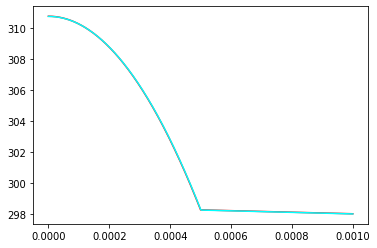

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import scipy.special as spe



a = 0
b = 1e-3
c = 5e-4
n = 250
n = 2*n+1
T = 2000
c1 = 1000
c2 = 500 
rho1 = 1000 
rho2 = 8000
k1 = 0.1 
k2 = 10
q1 = 1e7 
q2 = 0 
alfa =1e3 
T_inf = 293.
gr = int(n*0.5) #boundary point is in the middle
# x grid of n points
X, dx = np.linspace(a,b,n,retstep=True)
dt = 1e0
cro1 = c1*rho1
cro2 = c2*rho2

def initial_u(y):
		return T_inf

#coefficients values in different points		
def k(a): 
	if (a < gr):
		return k1
	if (a > gr):
		return k2
	if (a == gr):
		return 2*k1*k2/(k1+k2)	
		
def cro(a):
	if (a < gr):
		return cro1
	if (a > gr):
		return cro2
	if (a == gr):
		return 2*cro1*cro2/(cro1+cro2)
def q(a):
	if (a < gr):
		return q1
	if (a > gr):
		return q2
	if (a == gr):
		return 2*q1*q2/(q1+q2)
		
def TDMA(a,b,c,f):#tree diagonal matrix system solution
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))

    x[n-1] = beta[n - 1]

    for i in range(n-1, 0, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]

    return x


U = np.zeros((T,len(X)))

def u(x, t): #numeric solution
	a = np.zeros(len(x))
	b = np.zeros(len(x))
	c = np.ones(len(x))
	f = np.ones(len(x))
	u1 = np.zeros(len(x))
	if t == 0: 
		return np.array([initial_u(x[i]) for i in range(len(x))])
	else:
		for j in range(1,len(x)-1):
			if (j!=0) and (j!=len(x)):
				km = k(j-1)
				kp = k(j)
				a[j] = -0.5*km/(dx**2)
				b[j] = -0.5*kp/(dx**2)
				c[j] = cro(j)/dt+0.5*(kp+km)/(dx**2)
				f[j] = (q(j)+q(j-1))/2 + cro(j)*U[t-1][j]/dt + 0.5*(kp*(U[t-1][j+1]-U[t-1][j])/(dx) + km*(U[t-1][j-1]-U[t-1][j])/(dx))/dx
		
		a[0] = 0
		b[0] = -1
		c[0] = 1
		f[0] = 0
		
		a[-1] = -k(n)/dx 
		b[-1] = 0
		c[-1] = k(n)/dx + alfa
		f[-1] = alfa*T_inf
		
		u1 = TDMA(a,b,c,f)

		return u1

# solve for 700 time steps
for t in range(T):
    U[t,:] = u(X,t)
print('T_0 =', U[T-1,0])
print('T_b =', U[T-1,gr])
print ('T_a =', U[T-1,len(X)-1])
print ('Макс. температура за все установления =', np.amax(U))
print ('Макс. температура в стационарном режиме=',max(U[T-1,:]))
print ('Мин. температура за все установления =', np.amin(U))
print ('Мин. температура в стационарном режиме=',min(U[T-1,:]))
def solution():
	p=c*q1/k2
	T_a=T_inf+c*q1/alfa
	T_0=T_a + (c**2)*q1/(2*k1)+c*q1*(b-c)/k2
	y=np.zeros(len(X))
	
	for i in range(len(X)):
		if (X[i]<c):
			y[i]=T_0 - X[i]**2 * q1/(2*k1)
		else:
			y[i]=T_a + p*(b-X[i])
	return y
print('T_0точ =', solution()[1])
print('T_bточ =', solution()[gr] )
print ('T_aточ =', solution()[len(X)-1])


plt.plot(X,solution(), "red")
plt.plot(X, U[T-1,:], "cyan")
plt.show()






Определим фактический порядок аппроксимации. Для этого на данном
интервале будем задавать различные числа шагов и наблюдать, как меняется
ошибка решения. Видим, что ошибка возрастает линейно с увеличением шага. Делаем вывод, что схема Кранка-Николсона дает 1 порядок аппроксимации.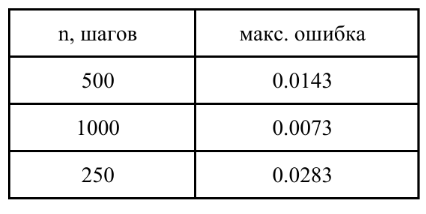